# Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import sklearn 
%matplotlib inline

In [2]:
df = pd.read_csv("myheartdata.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
count_zeros = df["HeartDisease"].value_counts()[0]
count_ones = df["HeartDisease"].value_counts()[1]

print("Count of zeros:", count_zeros)
print("Count of ones:", count_ones)

Count of zeros: 410
Count of ones: 508


In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [8]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [9]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [10]:
pd.set_option('display.max_rows',918)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [13]:
df.shape

(918, 12)

In [14]:
#to check missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [15]:
# df =  df.dropna(axis=1)
# no null column

In [16]:
df.shape

(918, 12)

In [17]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [18]:
df.duplicated().sum()

0

In [19]:
print(df["Sex"].unique())
print(df["ExerciseAngina"].unique())
print(df["ChestPainType"].unique())
print(df["RestingECG"].unique())
print(df["ST_Slope"].unique())
print(df["FastingBS"].unique())
print(df["HeartDisease"].unique())

['M' 'F']
['N' 'Y']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['Up' 'Flat' 'Down']
[0 1]
[0 1]


In [20]:
n_c = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
df[n_c].corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000


<AxesSubplot:>

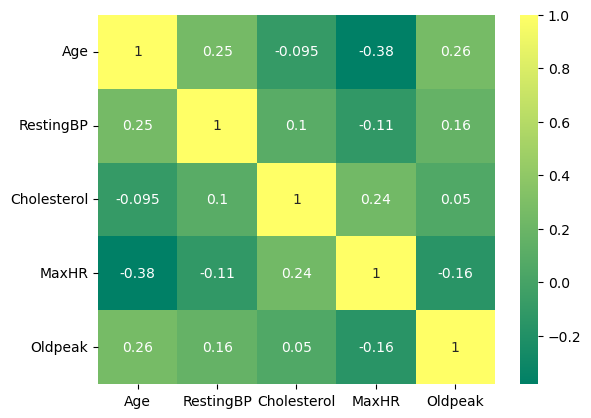

In [21]:
sn.heatmap(df[n_c].corr(), annot = True, cbar = True, cmap ='summer' )

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

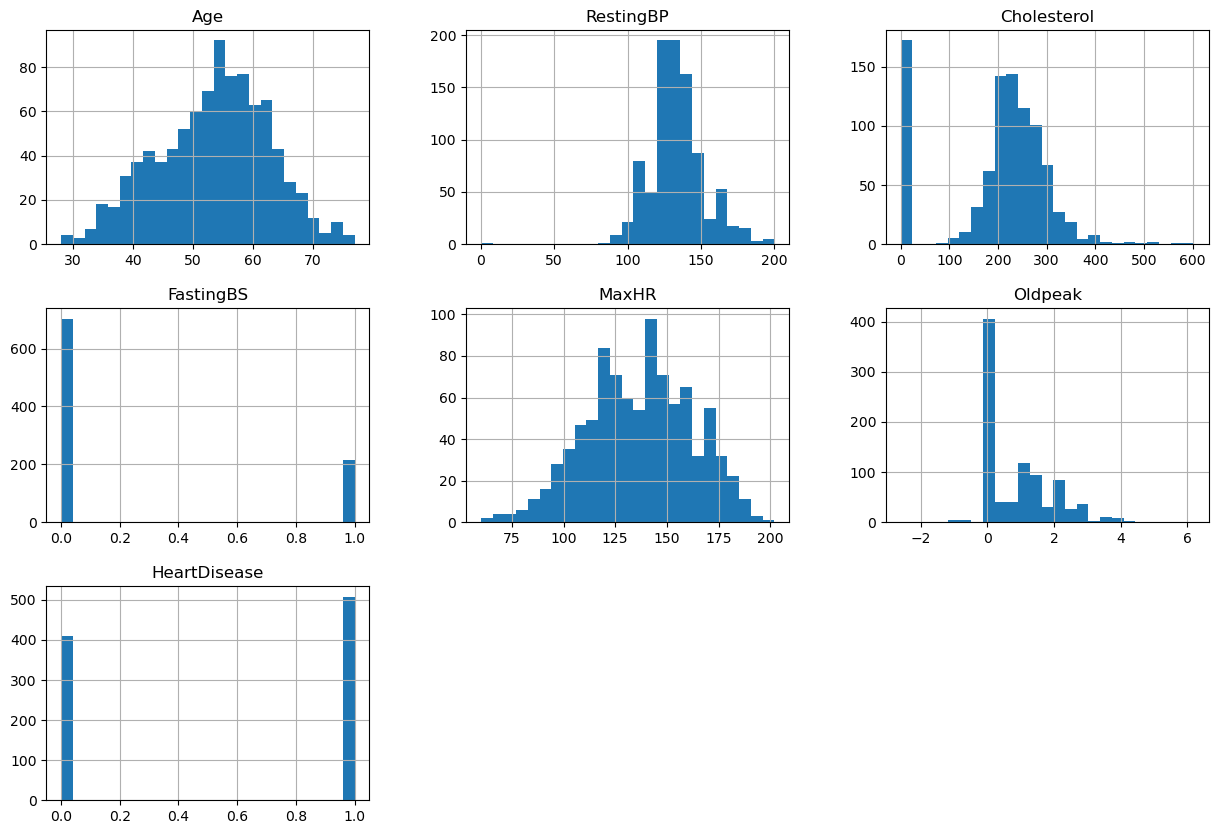

In [22]:
df.hist(bins = 25, figsize = (15,10))

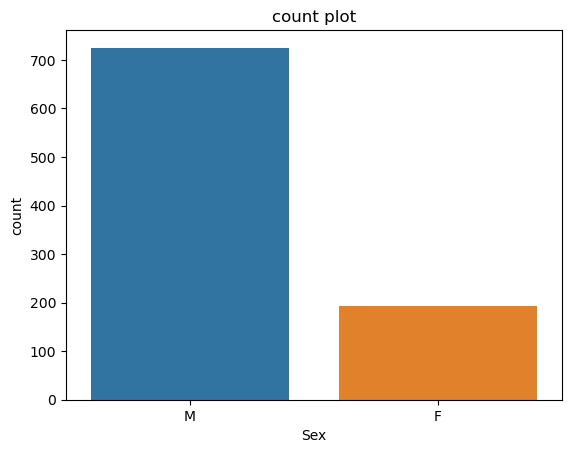

In [23]:
categorical_columns = ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope"]
sn.countplot(data=df, x='Sex')
plt.title("count plot")
plt.show()


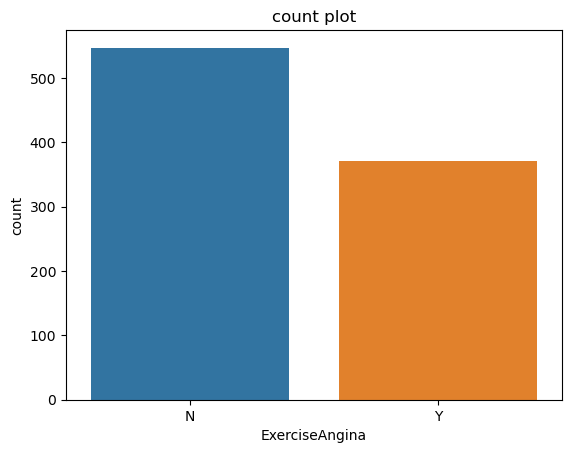

In [24]:
sn.countplot(data=df, x="ExerciseAngina")
plt.title("count plot")
plt.show()

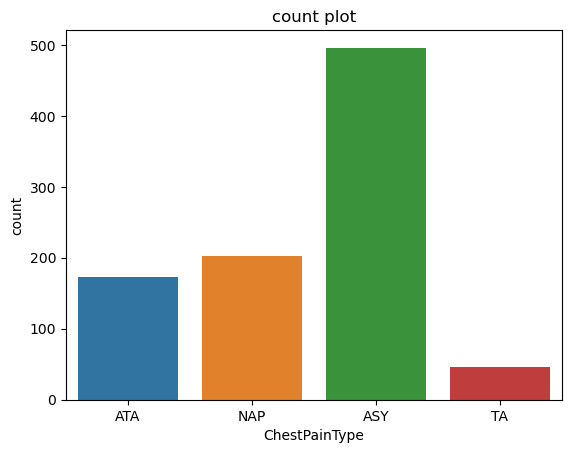

In [25]:
sn.countplot(data=df, x="ChestPainType")
plt.title("count plot")
plt.show()

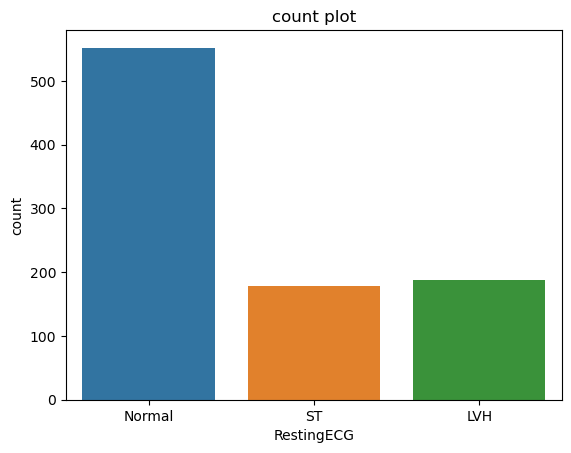

In [26]:
sn.countplot(data=df, x="RestingECG")
plt.title("count plot")
plt.show()

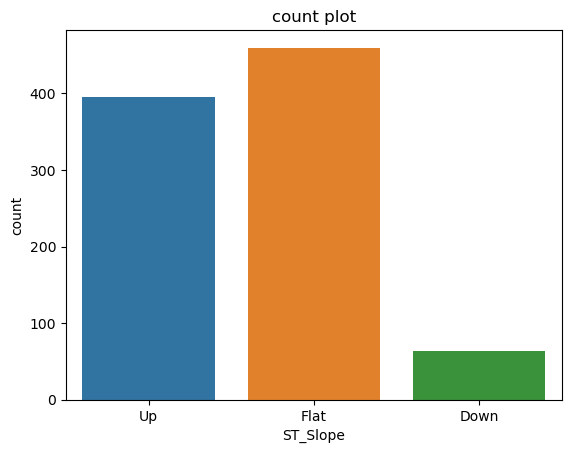

In [27]:
sn.countplot(data=df, x="ST_Slope")
plt.title("count plot")
plt.show()

In [28]:
# plt.plot(df['Age'],df['HeartDisease'])
# plt.show()

In [29]:
withoutlast = df.drop(df.columns[-1],axis=1)

In [30]:
withoutlast

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up


In [31]:
withoutlast.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [32]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [33]:
 withoutlast

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up


In [34]:
from sklearn.preprocessing import LabelEncoder
lis=[1,8,2,6,10]
labelencoder_EA = LabelEncoder()
for i in lis:
    df.iloc[:, i] = labelencoder_EA.fit_transform(df.iloc[:, i].values)
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


In [35]:
x = df.iloc[:,:-1]
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
5,39,1,2,120,339,0,1,170,0,0.0,2
6,45,0,1,130,237,0,1,170,0,0.0,2
7,54,1,1,110,208,0,1,142,0,0.0,2
8,37,1,0,140,207,0,1,130,1,1.5,1
9,48,0,1,120,284,0,1,120,0,0.0,2


In [36]:
y =  df.iloc[:,-1]
y

0      0
1      1
2      0
3      1
4      0
5      0
6      0
7      0
8      1
9      0
10     0
11     1
12     0
13     1
14     0
15     0
16     1
17     0
18     1
19     1
20     0
21     0
22     0
23     1
24     0
25     0
26     0
27     0
28     0
29     0
30     1
31     0
32     1
33     1
34     0
35     0
36     1
37     0
38     0
39     0
40     0
41     1
42     0
43     0
44     1
45     0
46     0
47     0
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     0
56     1
57     1
58     0
59     1
60     0
61     0
62     0
63     1
64     0
65     0
66     0
67     0
68     1
69     0
70     1
71     0
72     1
73     0
74     1
75     0
76     1
77     0
78     0
79     1
80     0
81     0
82     1
83     0
84     1
85     1
86     1
87     0
88     1
89     0
90     0
91     0
92     0
93     1
94     0
95     1
96     0
97     0
98     0
99     0
100    1
101    0
102    1
103    1
104    1
105    0
106    0
107    0
108    0
109    0
110    0
1

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
len(X_train)

734

In [40]:
len(X_test)

184

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [61]:
# adaboost_classifier = AdaBoostClassifier(random_state=42)
# adaboost_classifier.fit(X_train_scaled, y_train)
# adaboost_cv_scores = cross_val_score(adaboost_classifier, X_train_scaled, y_train, cv=10)

# print("AdaBoost Classifier:")
# print("Cross-Validation Scores:", adaboost_cv_scores)
# print("Mean CV Accuracy:", adaboost_cv_scores.mean())


In [69]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


adaboost_classifier = AdaBoostClassifier(random_state=42)

adaboost_classifier.fit(X_train_scaled, y_train)


train_accuracy = accuracy_score(y_train, adaboost_classifier.predict(X_train_scaled))
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test, adaboost_classifier.predict(X_test_scaled))
print("Testing Accuracy:", test_accuracy)

adaboost_cv_scores = cross_val_score(adaboost_classifier, X_train_scaled, y_train, cv=10)

print("AdaBoost Classifier:")
print("Cross-Validation Scores:", adaboost_cv_scores)
print("Mean CV Accuracy:", np.mean(adaboost_cv_scores))



Training Accuracy: 0.8773841961852861
Testing Accuracy: 0.8532608695652174
AdaBoost Classifier:
Cross-Validation Scores: [0.90540541 0.86486486 0.87837838 0.85135135 0.84931507 0.84931507
 0.82191781 0.83561644 0.91780822 0.84931507]
Mean CV Accuracy: 0.8623287671232877


In [70]:
# gaussian_nb_classifier = GaussianNB()
# gaussian_nb_classifier.fit(X_train_scaled, y_train)
# gaussian_nb_cv_scores = cross_val_score(gaussian_nb_classifier, X_train_scaled, y_train, cv=10)
# print("Gaussian Naive Bayes:")
# print("Cross-Validation Scores:", gaussian_nb_cv_scores)
# print("Mean CV Accuracy:", gaussian_nb_cv_scores.mean())
# print()

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

gaussian_nb_classifier = GaussianNB()

gaussian_nb_classifier.fit(X_train_scaled, y_train)

train_accuracy = accuracy_score(y_train, gaussian_nb_classifier.predict(X_train_scaled))
print("Training Accuracy (Gaussian Naive Bayes):", train_accuracy)

test_accuracy = accuracy_score(y_test, gaussian_nb_classifier.predict(X_test_scaled))
print("Testing Accuracy (Gaussian Naive Bayes):", test_accuracy)

gaussian_nb_cv_scores = cross_val_score(gaussian_nb_classifier, X_train_scaled, y_train, cv=10)

print("Gaussian Naive Bayes:")
print("Cross-Validation Scores:", gaussian_nb_cv_scores)
print("Mean CV Accuracy:", np.mean(gaussian_nb_cv_scores))


Training Accuracy (Gaussian Naive Bayes): 0.8637602179836512
Testing Accuracy (Gaussian Naive Bayes): 0.842391304347826
Gaussian Naive Bayes:
Cross-Validation Scores: [0.94594595 0.89189189 0.89189189 0.83783784 0.82191781 0.80821918
 0.83561644 0.87671233 0.89041096 0.80821918]
Mean CV Accuracy: 0.8608663457978526


In [72]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

mlp_classifier = MLPClassifier(random_state=42)

mlp_classifier.fit(X_train_scaled, y_train)

train_accuracy = accuracy_score(y_train, mlp_classifier.predict(X_train_scaled))
print("Training Accuracy (MLP Classifier):", train_accuracy)

test_accuracy = accuracy_score(y_test, mlp_classifier.predict(X_test_scaled))
print("Testing Accuracy (MLP Classifier):", test_accuracy)

mlp_cv_scores = cross_val_score(mlp_classifier, X_train_scaled, y_train, cv=10)

print("Multilayer Perceptron (MLP) Classifier:")
print("Cross-Validation Scores:", mlp_cv_scores)
print("Mean CV Accuracy:", np.mean(mlp_cv_scores))



Training Accuracy (MLP Classifier): 0.9100817438692098
Testing Accuracy (MLP Classifier): 0.8913043478260869
Multilayer Perceptron (MLP) Classifier:
Cross-Validation Scores: [0.90540541 0.85135135 0.87837838 0.87837838 0.80821918 0.87671233
 0.80821918 0.87671233 0.90410959 0.82191781]
Mean CV Accuracy: 0.8609403924472417


In [73]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
knn_cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=10)
print("K-Nearest Neighbors:")
print("Cross-Validation Scores:", knn_cv_scores)
print("Mean CV Accuracy:", knn_cv_scores.mean())
print()

K-Nearest Neighbors:
Cross-Validation Scores: [0.90540541 0.87837838 0.89189189 0.87837838 0.84931507 0.8630137
 0.80821918 0.8630137  0.89041096 0.82191781]
Mean CV Accuracy: 0.8649944465012958



In [74]:
from sklearn.metrics import accuracy_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import cross_val_score
gpc_classifier = GaussianProcessClassifier(random_state=42)
gpc_classifier.fit(X_train_scaled, y_train)

train_accuracy = accuracy_score(y_train, gpc_classifier.predict(X_train_scaled))
print("Training Accuracy (GPC):", train_accuracy)

test_accuracy = accuracy_score(y_test, gpc_classifier.predict(X_test_scaled))
print("Testing Accuracy (GPC):", test_accuracy)

gpc_cv_scores = cross_val_score(gpc_classifier, X_train_scaled, y_train, cv=10)

print("Gaussian Process Classifier (GPC):")
print("Cross-Validation Scores:", gpc_cv_scores)
print("Mean CV Accuracy:", np.mean(gpc_cv_scores))


Training Accuracy (GPC): 0.9673024523160763
Testing Accuracy (GPC): 0.8804347826086957
Gaussian Process Classifier (GPC):
Cross-Validation Scores: [0.89189189 0.85135135 0.87837838 0.91891892 0.82191781 0.84931507
 0.78082192 0.87671233 0.90410959 0.78082192]
Mean CV Accuracy: 0.8554239170677527


In [75]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_classifier = PassiveAggressiveClassifier(random_state=42)

pa_classifier.fit(X_train_scaled, y_train)

train_accuracy = accuracy_score(y_train, pa_classifier.predict(X_train_scaled))
print("Training Accuracy (Passive Aggressive Classifier):", train_accuracy)

test_accuracy = accuracy_score(y_test, pa_classifier.predict(X_test_scaled))
print("Testing Accuracy (Passive Aggressive Classifier):", test_accuracy)

pa_cv_scores = cross_val_score(pa_classifier, X_train_scaled, y_train, cv=10)
print("Passive Aggressive Classifier:")
print("Cross-Validation Scores:", pa_cv_scores)
print("Mean CV Accuracy:", np.mean(pa_cv_scores))


Training Accuracy (Passive Aggressive Classifier): 0.7683923705722071
Testing Accuracy (Passive Aggressive Classifier): 0.75
Passive Aggressive Classifier:
Cross-Validation Scores: [0.83783784 0.86486486 0.82432432 0.67567568 0.79452055 0.80821918
 0.73972603 0.71232877 0.79452055 0.80821918]
Mean CV Accuracy: 0.7860236949278046


In [48]:
# def models(X_train,Y_train):
#     from sklearn.svm import SVC
#     modelsv = SVC(kernel ='linear')
#     modelsv.fit(X_train,y_train)
#     print(modelsv.score(X_test,y_test))
    
#     from sklearn.linear_model import LogisticRegression
#     logre = LogisticRegression(random_state=0, max_iter=1000)
#     logre.fit(X_train,y_train)
#     print(logre.score(X_train,y_train))
    
#     from sklearn.tree import DecisionTreeClassifier
#     dt =  DecisionTreeClassifier(random_state=0,criterion ="entropy")
#     dt.fit(X_train,y_train)
#     print(dt.score(X_train,y_train))
    
#     from sklearn.ensemble import RandomForestClassifier
#     r = RandomForestClassifier(random_state=0,criterion ="entropy",n_estimators=10)
#     r.fit(X_train,y_train)
#     print(r.score(X_train,y_train))
#     return modelsv,logre,dt,r

# model = models(X_train,y_train)
# # print(model)


In [43]:
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# models= {
#     "Logistic Regression": LogisticRegression(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "Support Vector Machine": SVC()
# }
# pipelines = {}
# for name, model in models.items():
#     pipeline = make_pipeline(StandardScaler(), model) 
    
#     pipeline.fit(X_train, y_train)
#     pipelines[name] = pipeline  
#     y_pred = pipeline.predict(X_test)
    
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"{name}: Accuracy = {accuracy:.2f}\n")
#     print("Report:\n",classification_report(y_test, y_pred))
#     print("="*50)
# #

In [44]:
y_test

668    0
30     1
377    1
535    1
807    0
793    1
363    1
583    0
165    1
483    1
773    0
551    0
768    0
694    0
718    1
312    1
713    0
309    1
846    1
616    0
355    1
39     0
231    0
822    0
603    1
63     1
192    0
481    1
866    0
67     0
72     1
655    1
679    0
139    1
732    1
824    0
174    1
896    0
499    1
70     1
716    1
23     1
541    1
799    0
672    0
826    0
250    1
752    1
350    1
758    0
759    1
107    0
445    1
141    1
650    1
544    0
110    0
593    1
519    1
907    1
675    0
280    0
136    0
422    1
208    0
442    1
86     1
44     1
531    1
913    1
634    0
290    0
338    1
357    1
292    0
227    1
591    0
425    1
789    0
522    1
861    1
352    1
493    1
60     0
598    1
722    1
426    0
468    1
66     0
332    0
375    1
381    1
557    1
260    0
235    0
218    0
382    1
439    0
762    1
305    1
137    0
538    1
76     1
794    0
436    1
266    1
215    0
334    1
523    1
507    0
209    1
4

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train_scaled, y_train)
best_rf_model = grid_search.best_estimator_

In [47]:
train_accuracy = accuracy_score(y_train, best_rf_model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, best_rf_model.predict(X_test_scaled))

print("Best Model Parameters:", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Best Model Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training Accuracy: 0.9754768392370572
Testing Accuracy: 0.8858695652173914


In [48]:
from sklearn.metrics import classification_report

# Get predictions on the test set using the best estimator
y_pred_test = best_rf_model.predict(X_test_scaled)

# Generate classification report for the test set
report_test = classification_report(y_test, y_pred_test)

print("Best Model Parameters:", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy) 
print("Classification Report for Testing Data:")
print(report_test)


Best Model Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Training Accuracy: 0.9754768392370572
Testing Accuracy: 0.8858695652173914
Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [49]:
y_pred_test

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [50]:
# Define a mapping dictionary
ordinal_mapping = {0: 'No', 1: 'Yes'}

# Convert the array of predictions into ordinal values
predictions_ordinal = [ordinal_mapping[pred] for pred in y_pred_test]

# Print the converted predictions
print(predictions_ordinal)


['No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', '

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))

0.8583106267029973


In [52]:
pred = model.predict(X_test)
pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [53]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# model_score = model.score(X_test, y_test)
# print(model_score)

# y_predict = model.predict(X_test)

# print(confusion_matrix(y_test, y_predict))
# print(classification_report(y_test, y_predict))


In [54]:
import pickle

In [55]:
pickle.dump(model,open('model.pkl',"wb+"))

In [56]:
# pickle.dump(best_rf_model, open('model.pkl', 'wb+'))

In [57]:
# import joblib

In [58]:
# joblib.dump(best_rf_model, 'model.pkl')
